In [ ]:
import os

training_data = os.listdir('train/')[:13000]

print(len(training_data))

print(training_data)



In [24]:
labels =  []

for animal in training_data:
    if 'cat' in animal :
        labels.append(0)
    else :
        labels.append(1)


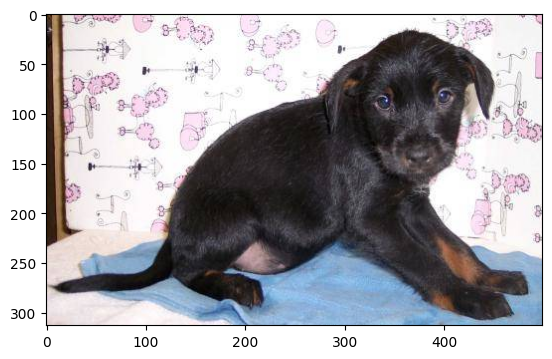

In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as img

cat_image = img.imread('train/cat.5244.jpg')
plt.imshow(cat_image)

dog_image = img.imread('train/dog.7415.jpg')
plt.imshow(dog_image)


In [26]:
#import PIL 
#for file_name in training_data:
#    img = PIL.Image.open('train/' + file_name)
#    img = img.resize((224,224))
#    img = img.convert('RGB')

#    img.save('resized/' + file_name)

In [27]:
import cv2
import numpy as np 

cat_dog_images = []

for file_name in training_data:
    img = cv2.imread('resized/' + file_name)

    cat_dog_images.append(img)

cat_dog_images = np.asarray(cat_dog_images)

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 4 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 5 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 5 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 5 extraneous bytes before marker 0xd9
Corrupt JPEG data: 4 

In [28]:
from sklearn.model_selection import train_test_split 

labels = np.asarray(labels)

x_train, x_test, y_train, y_test = train_test_split(cat_dog_images, labels, test_size=0.2, random_state=2)

x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [29]:
import tensorflow as tf
import tensorflow_hub as hub


mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [30]:
model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(2)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_2 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [31]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [32]:
model.fit(x_train_scaled, y_train, epochs = 5)

Epoch 1/5
325/325 [==============================] - 49s 146ms/step - loss: 0.0988 - acc: 0.9613
Epoch 2/5
325/325 [==============================] - 49s 149ms/step - loss: 0.0519 - acc: 0.9819
Epoch 3/5
325/325 [==============================] - 44s 134ms/step - loss: 0.0430 - acc: 0.9849
Epoch 4/5
325/325 [==============================] - 49s 152ms/step - loss: 0.0388 - acc: 0.9868
Epoch 5/5
325/325 [==============================] - 48s 147ms/step - loss: 0.0355 - acc: 0.9875


In [33]:
score, acc = model.evaluate(x_test_scaled, y_test)
print('Score: ', score)
print('Accuracy: ', acc)

82/82 [==============================] - 11s 132ms/step - loss: 0.0635 - acc: 0.9804
Score:  0.06346430629491806
Accuracy:  0.9803845882415771


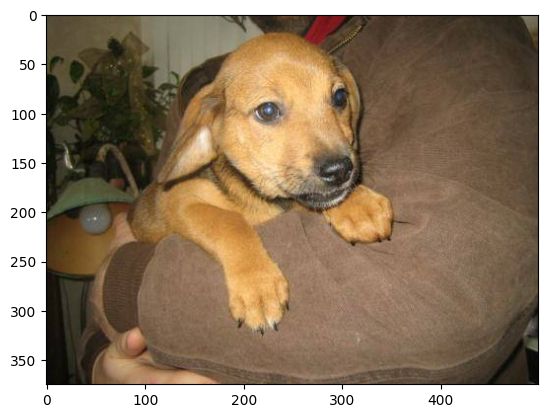

In [36]:
import matplotlib.image as img
image_number = 420

test_image = img.imread(f"test1/{image_number}.jpg")
plt.imshow(test_image)

In [38]:
input_image = cv2.imread(f"test1/{image_number}.jpg")

input_image = cv2.resize(input_image, (224,224))

input_image = input_image/255

input_image = np.reshape(input_image, [1,224,224,3])

prediction = model.predict(input_image)

print(prediction)

cat_or_dog = np.argmax(prediction)

print(cat_or_dog)

1/1 [==============================] - 0s 23ms/step
[[-5.1604557  3.9448624]]
1
